In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spatial

In [168]:
n_p = 5000
data = np.loadtxt("../../Downloads/TracingTheCosmicWeb_PublicData/fof_catalog_200Mpc512.txt", skiprows=3)
data = data[:n_p,[1,2,3]]

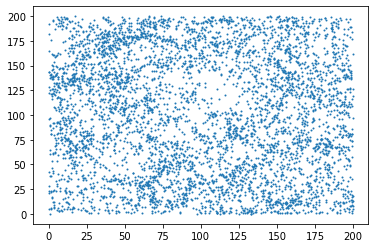

In [169]:
plt.scatter(data[:,0], data[:,1], s=1.0)

In [170]:
n_r = np.shape(data)[0]
data_random = np.random.random(size=(n_r,3))*200
points = np.vstack([data, data_random])
np.shape(points)

(10000, 3)

In [171]:
data

array([[141.6838, 168.7701,  18.8034],
       [ 45.7796, 172.4404, 159.1376],
       [ 27.5096, 160.0697, 140.5773],
       ...,
       [ 96.5467,  56.3145, 101.8467],
       [ 75.1431, 180.1889, 180.2152],
       [137.6387,  69.4274,  93.2247]])

In [172]:
tri = spatial.Delaunay(points)

In [173]:
pairs = []
for simplex in tri.simplices:
    a = simplex[0]
    b = simplex[1]
    c = simplex[2]
    d = simplex[3]
    if ([a,b] not in pairs) and ([b,a] not in pairs):
        pairs.append([a,b])
    if ([b,c] not in pairs) and ([c,b] not in pairs):
        pairs.append([b,c])
    if ([a,c] not in pairs) and ([c,a] not in pairs):
        pairs.append([a,c])
    if ([a,d] not in pairs) and ([d,a] not in pairs):
        pairs.append([a,d])
    if ([c,d] not in pairs) and ([d,c] not in pairs):
        pairs.append([c,d])
    if ([b,d] not in pairs) and ([d,b] not in pairs):
        pairs.append([b,d])

In [174]:
n_to_random = np.zeros(n_p+n_r)
n_to_data = np.zeros(n_p+n_r)

for p in pairs:
    a = p[0]
    b = p[1]
    a_is_data = True
    b_is_data = True
    if a>n_p:
        a_is_data = False
    if b>n_p:
        b_is_data = False
        
    if a_is_data:
        n_to_data[b] +=1 
    else:
        n_to_random[b] +=1
    
    if b_is_data:
        n_to_data[a] +=1 
    else:
        n_to_random[a] +=1

In [191]:
is_void = (n_to_data==0)
is_peak = (n_to_random==0)
is_filament = (n_to_data>n_to_random) & (~is_peak)
is_sheet = (~is_void) & (~is_peak) & (~is_filament)

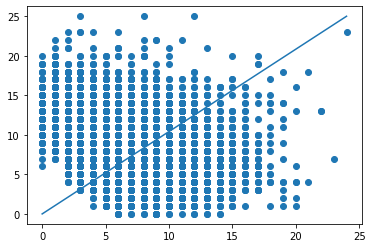

In [192]:
plt.scatter(n_to_data, n_to_random)
plt.plot(np.linspace(0,25,25))

[-6.  1.  7.]
all 5.656581002690583 -1.0556
data 4.780997515163546 0.7174
random 5.903289086602485 -2.8286


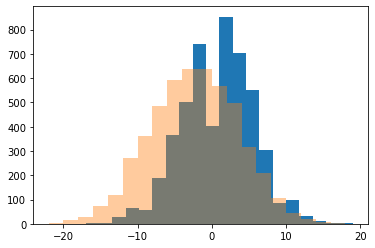

In [193]:
a=n_to_data-n_to_random
print(np.percentile(a[:n_p], [10,50,90]))
plt.hist(a[:n_p], bins=20)
plt.hist(a[n_p:], alpha=0.4, bins=20)
print('all', np.std(a),np.mean(a))
print('data', np.std(a[:n_p]),np.mean(a[:n_p]))
print('random', np.std(a[n_p:]),np.mean(a[n_p:]))

In [197]:
diff_limit  = np.std(a)
is_void = a<-diff_limit
is_peak = a> diff_limit
is_filament = (a>=0) & (~is_peak)
is_sheet = (a<0) & (~is_void)

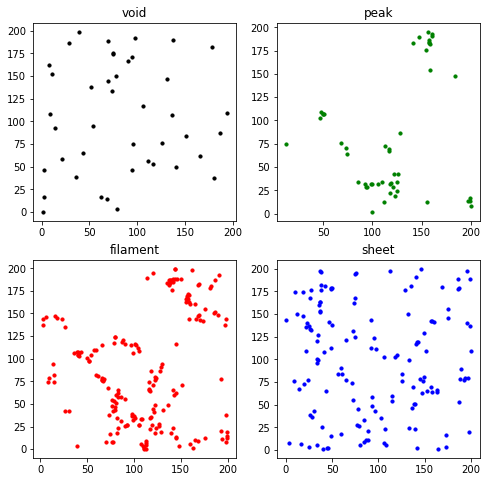

In [198]:
is_data = np.arange(n_p+n_r) < n_p
is_random = ~is_data
is_slice = (points[:,2]>80) & (points[:,2]<100)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(points[is_data&is_void&is_slice,0], points[is_data&is_void&is_slice,1], color='black', s=10)
plt.title('void')

plt.subplot(2,2,2)
plt.scatter(points[is_data&is_peak&is_slice,0], points[is_data&is_peak&is_slice,1], color='green', s=10)
plt.title('peak')

plt.subplot(2,2,3)
plt.scatter(points[is_data&is_filament&is_slice,0], points[is_data&is_filament&is_slice,1], color='red', s=10)
plt.title('filament')

plt.subplot(2,2,4)
plt.title('sheet')
plt.scatter(points[is_data&is_sheet&is_slice,0], points[is_data&is_sheet&is_slice,1], color='blue', s=10)

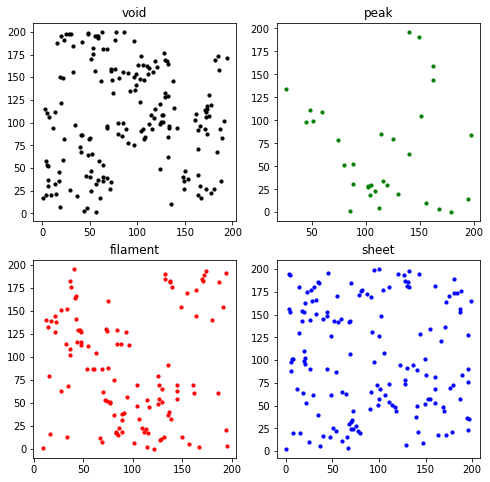

In [199]:
is_data = np.arange(n_p+n_r) < n_p
is_random = ~is_data

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(points[is_random&is_void&is_slice,0], points[is_random&is_void&is_slice,1], color='black', s=10)
plt.title('void')

plt.subplot(2,2,2)
plt.scatter(points[is_random&is_peak&is_slice,0], points[is_random&is_peak&is_slice,1], color='green', s=10)
plt.title('peak')

plt.subplot(2,2,3)
plt.scatter(points[is_random&is_filament&is_slice,0], points[is_random&is_filament&is_slice,1], color='red', s=10)
plt.title('filament')

plt.subplot(2,2,4)
plt.title('sheet')
plt.scatter(points[is_random&is_sheet&is_slice,0], points[is_random&is_sheet&is_slice,1], color='blue', s=10)

In [200]:
a=n_to_data-n_to_random

n_points = 20
diff_values = np.linspace(0.0,3,n_points)
void_vff = np.ones(n_points)
peak_vff = np.ones(n_points)
filament_vff = np.ones(n_points)
sheet_vff = np.ones(n_points)


is_data = np.arange(n_p+n_r) < n_p
is_random = ~is_data

for i, limit in enumerate(diff_values):
    diff_limit = limit * np.std(a)
    is_void = a<-diff_limit
    is_peak = a> diff_limit
    is_filament = (a>=0) & (~is_peak)
    is_sheet = (a<0) & (~is_void)
    
    void_vff[i] = np.count_nonzero(is_void & is_random)/np.count_nonzero(is_random)
    peak_vff[i] = np.count_nonzero(is_peak & is_random)/np.count_nonzero(is_random)
    filament_vff[i] = np.count_nonzero(is_filament & is_random)/np.count_nonzero(is_random)
    sheet_vff[i] = np.count_nonzero(is_sheet & is_random)/np.count_nonzero(is_random)

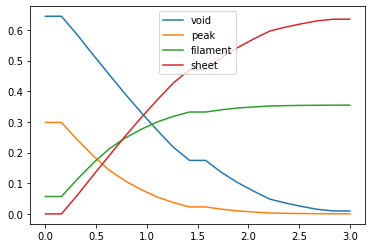

In [201]:
plt.plot(diff_values, void_vff, label='void')
plt.plot(diff_values, peak_vff, label='peak')
plt.plot(diff_values, filament_vff, label='filament')
plt.plot(diff_values, sheet_vff, label='sheet')
plt.legend()